In [38]:
import pandas as pd
df = pd.read_csv('../data/PEMS07/PEMS07.csv')

print(df.head())


   from   to   cost
0   721  445  0.790
1   542  480  2.575
2   770  702  0.926
3    32  266  0.596
4    34   56  0.628


In [39]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.02, random_state=42)
iso_forest.fit(df[['cost']])

df['Anomaly'] = iso_forest.predict(df[['cost']])
df['Anomaly'] = df['Anomaly'].map({1: 0, -1: 1}) 

print(df)


     from   to   cost  Anomaly
0     721  445  0.790        0
1     542  480  2.575        0
2     770  702  0.926        0
3      32  266  0.596        0
4      34   56  0.628        0
..    ...  ...    ...      ...
861   591  600  8.862        1
862   374   40  1.471        0
863   477  498  1.596        0
864   710  843  0.785        0
865   396  352  6.296        0

[866 rows x 4 columns]


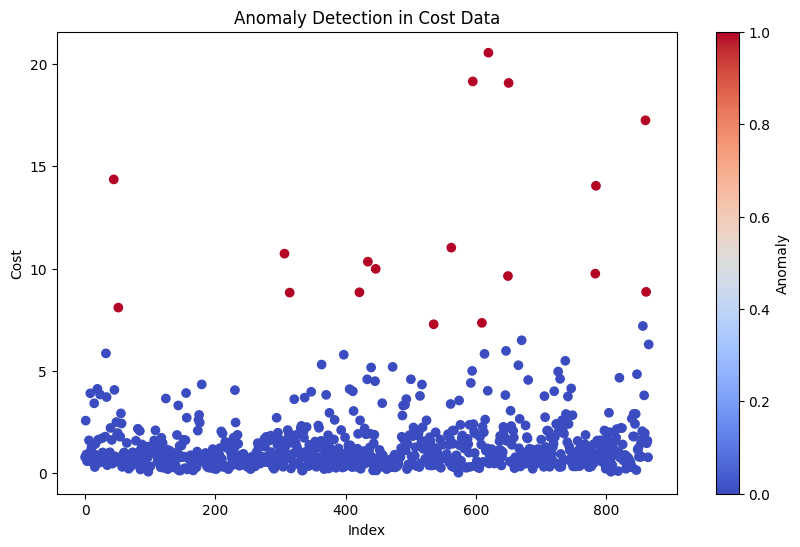

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['cost'], c=df['Anomaly'], cmap='coolwarm', marker='o')
plt.xlabel('Index')
plt.ylabel('Cost')
plt.title('Anomaly Detection in Cost Data')
plt.colorbar(label='Anomaly')
plt.show()


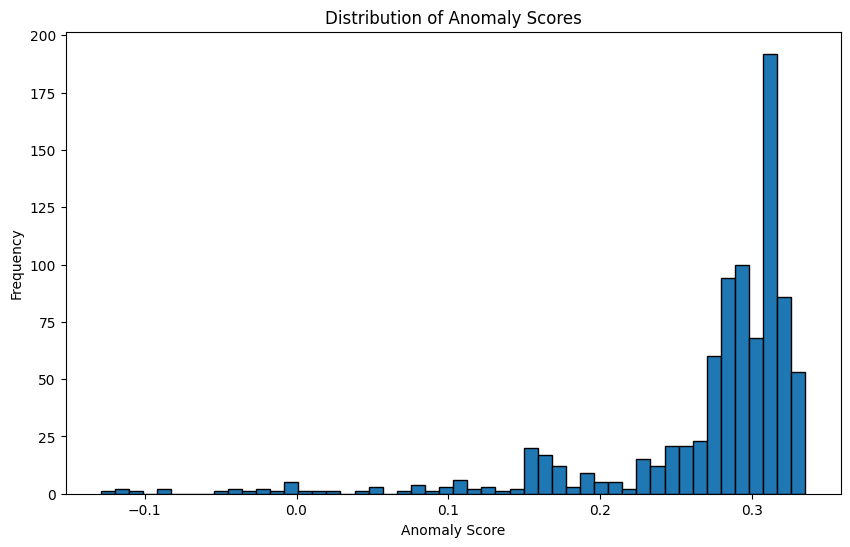

In [41]:

df['Anomaly_Score'] = iso_forest.decision_function(df[['cost']])


plt.figure(figsize=(10, 6))
plt.hist(df['Anomaly_Score'], bins=50, edgecolor='k')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores')
plt.show()


In [42]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df[['cost']], df['Anomaly'])
print(f'Silhouette Score: {silhouette_avg:.2f}')


Silhouette Score: 0.89


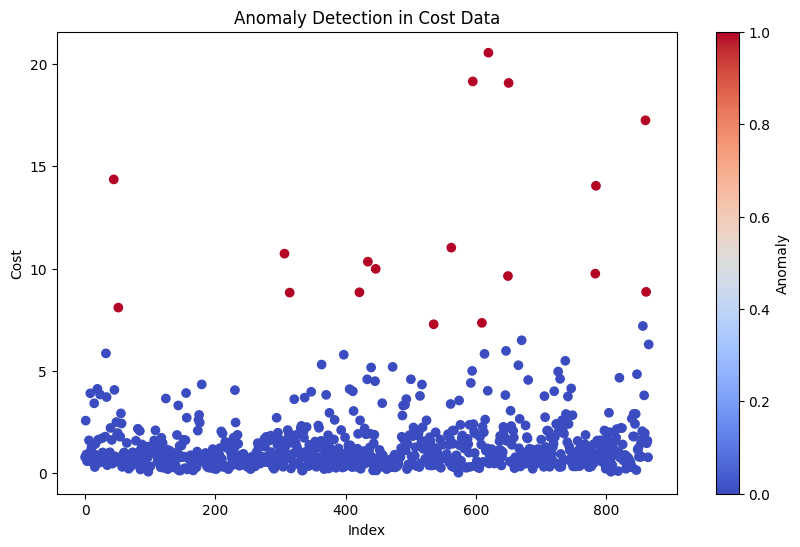

In [43]:

plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['cost'], c=df['Anomaly'], cmap='coolwarm', marker='o')
plt.xlabel('Index')
plt.ylabel('Cost')
plt.title('Anomaly Detection in Cost Data')
plt.colorbar(label='Anomaly')
plt.show()


In [44]:
import seaborn as sns


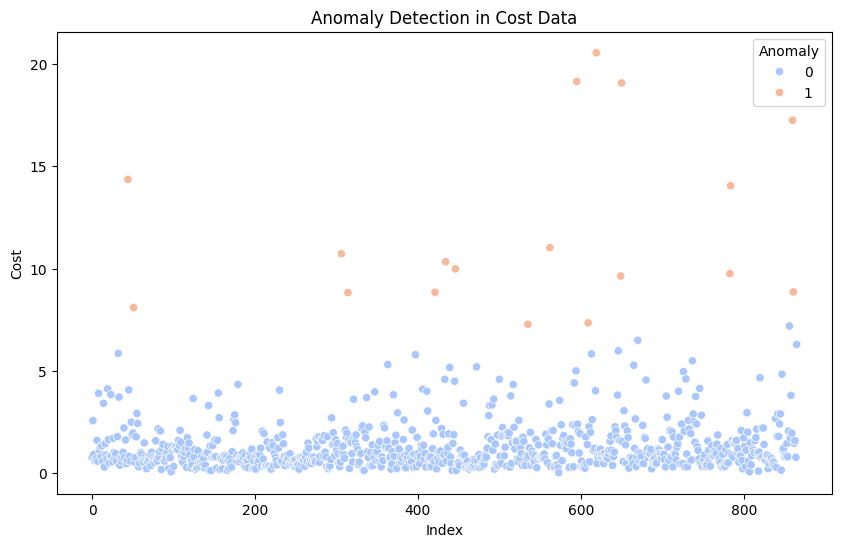

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df.index, y='cost', hue='Anomaly', palette='coolwarm', marker='o')
plt.xlabel('Index')
plt.ylabel('Cost')
plt.title('Anomaly Detection in Cost Data')
plt.show()

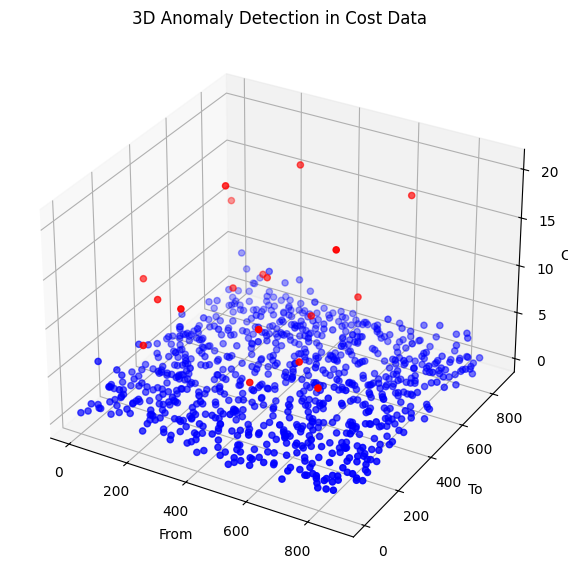

In [46]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
colors = df['Anomaly'].apply(lambda x: 'red' if x == 1 else 'blue')
sc = ax.scatter(df['from'], df['to'], df['cost'], c=colors, marker='o')

ax.set_xlabel('From')
ax.set_ylabel('To')
ax.set_zlabel('Cost')
ax.set_title('3D Anomaly Detection in Cost Data')

plt.show()
